# 8.可视化 Visualization                           


#### 笨办法学 Python 数据分析  / learn data analysis the hard way
- @Author：知行并重


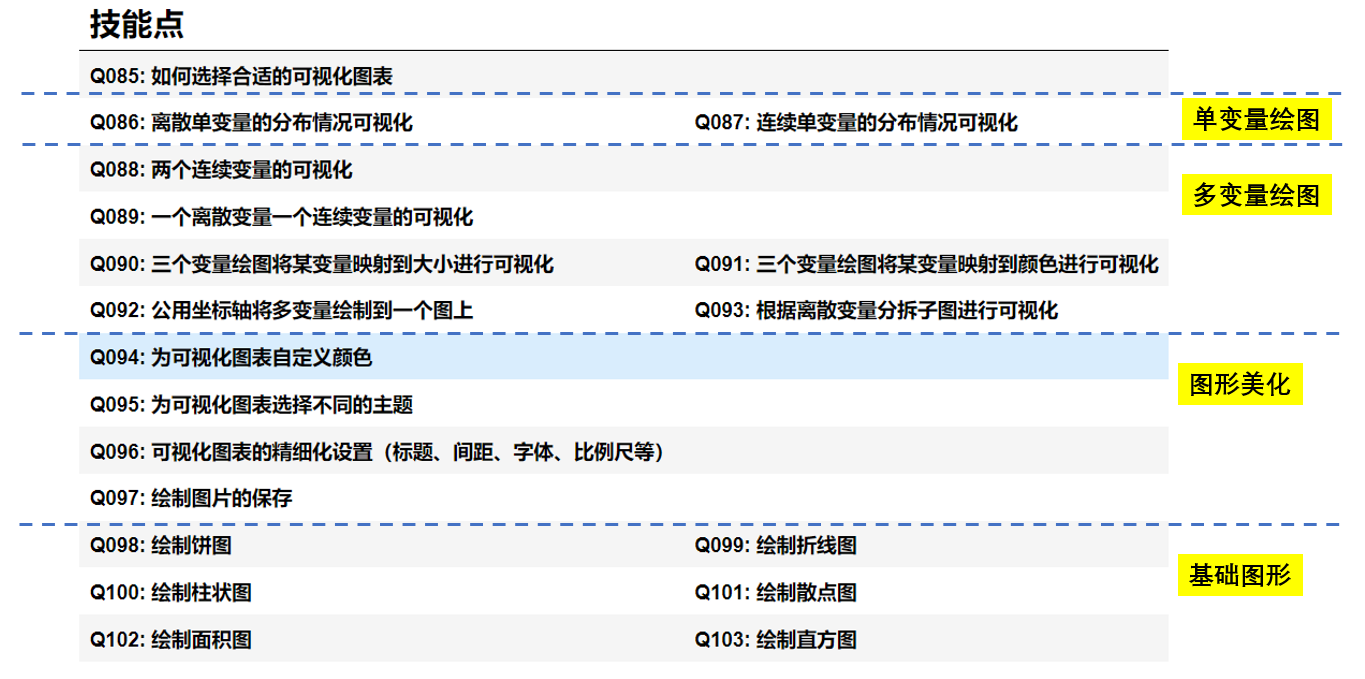

## 目录
1. **如何选图**
2. **如何画图**
    - 单变量
    - 双变量
    - 三变量（变量映射、分图）   
3. 图的**美化**
    - 配色
    - 主题
    - 其他
4. 图的**保存**

|<h2>技能点</h2> | |
|:-----|:-----|
|**Q085: 如何选择合适的可视化图表**|
|**Q086: 离散单变量的分布情况可视化**|**Q087: 连续单变量的分布情况可视化**|
|**Q088: 两个连续变量的可视化**|
|**Q089: 一个离散变量一个连续变量的可视化**|
|**Q090: 三个变量绘图将某变量映射到大小进行可视化**|**Q091: 三个变量绘图将某变量映射到颜色进行可视化**|
|**Q092: 公用坐标轴将多变量绘制到一个图上**|**Q093: 根据离散变量分拆子图进行可视化**|
|**Q094: 为可视化图表自定义颜色**|
|**Q095: 为可视化图表选择不同的主题**|
|**Q096: 可视化图表的精细化设置（标题、间距、字体、比例尺等）**|
|**Q097: 绘制图片的保存**|
|**Q098: 绘制饼图**|**Q099: 绘制折线图**|
|**Q100: 绘制柱状图**|**Q101: 绘制散点图**|
|**Q102: 绘制面积图**|**Q103: 绘制直方图**|


## 一 如何选图

### Q085: 如何选择合适的可视化图表

不管是 R、Python 中的绘图包都会提供很多函数以绘制不同的图形。如：直方图、柱状图、散点图、小提琴图、热力图等等。调用对应函数即可。通常相较于画图，选择合适图显得更为重要。我有个原则：

**根据变量数与变量类型选择**

我这里整理了一个简单的思维导图。

![](../pics/visualation.webp) 

## 二 如何画图

In [8]:
# !pip install matplotlib

import numpy as np
import pandas as pd

# 导入绘图包
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')  
%matplotlib inline 

In [42]:
data = pd.read_csv("../input/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1. 单变量
  单变量分为连续和离散。
  - 连续型变量
       - 分布图/直方图
       - 箱型图
       - `小提琴图`
   
   其实小提琴图，相当于是分布图与箱型图的结合，包含的信息更多。但是小提琴的图的另一半有点多余。
   所以我一般选择是 **分布图/直方图** > 小提琴图 > 箱型图。
   
   
  - 离散型变量
      - 柱状图
      
  直接做法是统计相应频数，然后转化为双变量中的连续（次数）& 离散的组合处理。

### Q086: 离散单变量的分布情况可视化

#### 2.1.2 柱状图

##### 2.1.2.1查看 Embarked 的分布情况

离散变量的分布查看通常先进行频数统计,然后再用柱状图可视化

S    644
C    168
Q     77
Name: Embarked, dtype: int64

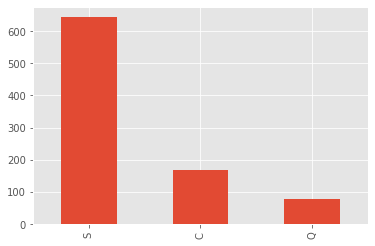

In [10]:
# 统计频数
result = data['Embarked'].value_counts()
result.plot(kind='bar')
result

### Q087: 连续单变量的分布情况可视化

#### 2.1.1 直方图

如上面所说,这主要针对连续变量,而且在第二章的时候我们也提过

##### 2.1.1.1查看 Age 的分布情况

<AxesSubplot:ylabel='Frequency'>

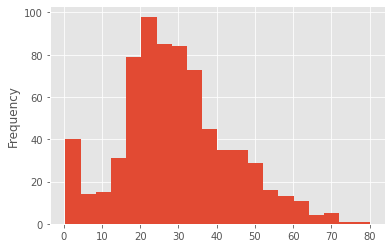

In [12]:
data['Age'].plot(kind='hist',bins=20)
# 默认划分10等份, 试试将 bins = 20 有什么变化 

单变量的其他绘图类型,感兴趣的小伙伴可以自行探索.  
借助帮助文档和搜索引擎,可以轻松解决. 因为不常用,所以暂不做介绍.

In [13]:
pd.DataFrame.plot??

![](https://imgkr.cn-bj.ufileos.com/899277ef-0236-4db1-ba5d-30cd6fa0ec2f.png)

### 2.2. 双变量
  根据变量类型，双变量时有两个连续变量，一个连续一个离散以及两个离散变量三种组合。每种组合的画图方案会有所不同。
  
  #### 2.2.1 两个连续型
  - 散点图
  - 折线图 
  - 面积图 相较于折线图，显得更饱满。
  
  特别当有一个是时间序列时，折线图、面积图效果更好

### Q088: 两个连续变量的可视化

#### 2.2.1.1 查看年龄【连续】与票价【连续】之间的关系

<AxesSubplot:xlabel='Age', ylabel='Fare'>

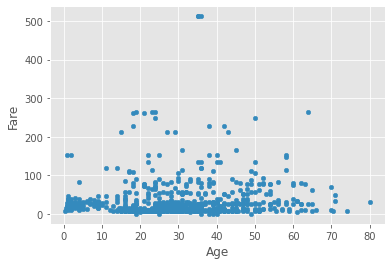

In [14]:
data.plot(x='Age',y='Fare',kind='scatter')

### Q089: 一个离散变量一个连续变量的可视化

    
#### 2.2.2 连续 & 离散
  此时，根据可视化的目的不同，而有所差异：
  - 比较类别**大小差异** 
  
  当数据中每个类别仅出现一次, 通常是在**数据聚合**之后.
  
  选择 柱状图（条形图）> 散点图； 或者 **饼图/雷达图**。
  
  之所以把饼图和雷达图单独列示一条，因为他们可以看成是柱状图和折线图极坐标下的展示。
  
  
  - 比较类别间 **分布差异**
  
   此时可以选择 多类别小提琴图，或者分布图。
   
![](https://imgkr.cn-bj.ufileos.com/182c10d2-817b-4bcc-b948-d061ebce0708.png)

#### 2.2.2.1 查看存活【离散】与否的两类人的平均年龄【连续】 (比较大小)

,Age
Survived,
0,30.626179
1,28.343690


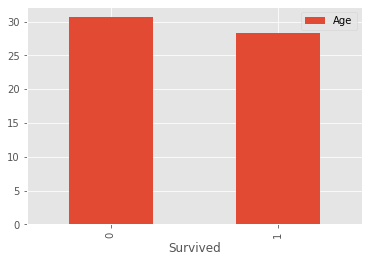

In [15]:
result = data.groupby(['Survived']).agg(np.mean)[['Age']]
result.plot(kind='bar')
result

#### 2.2.2.2 查看存活与否的两类人的年龄分布情况 (比较分布)

<AxesSubplot:ylabel='Frequency'>

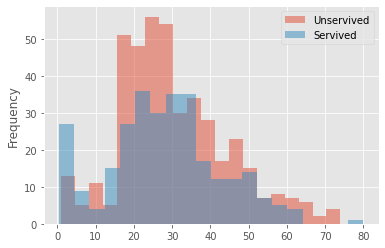

In [16]:
data.loc[data['Survived']==0,'Age'].plot(kind='hist',bins=20,label='Unservived',legend=True,alpha=0.5)
data.loc[data['Survived']==1,'Age'].plot(kind='hist',bins=20,label='Servived',legend=True,alpha=0.5)
# 其中 ,label='Servived',legend=True 两个参数为了设置图例的显示 内容.  ,alpha 是透明度
# 感兴趣的可以去 pd.DataFrame.plot 中了解更多内容

### 2.3. 三变量

- 三个连续变量

此时你可以选择 3D 图，并且matplotlib 也有相应函数。个人观点，3D图如果不是交互图的话，充其量算是2.5D，剩下的就考验脑补了。

而如果你打算采用2D的方式的，那么有以下几种方式处理：
   - 变量映射: 将第三个变量映射到 颜色or大小 。如气泡图就是这种方式。
   - 共享坐标轴，此时可以选择不同的显示方式，如是否堆积
   - 分图 `subplots()`

### Q090: 三个变量绘图将某变量映射到颜色进行可视化
#### 2.3.1 变量映射
是否存活【离散】的乘客 在年龄【连续】和票价【连续】上的分布情况 (映射到颜色)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

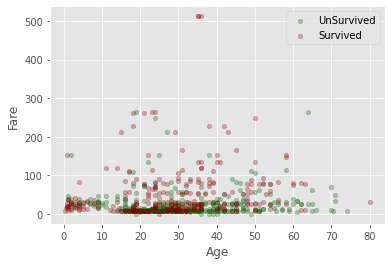

In [18]:
# 准备画布
fig,ax=plt.subplots(1,1,figsize=(6,4))
# 将不同的类别数据 绘制到同一张图上
data[data['Survived']==0].plot(x='Age',y='Fare',kind='scatter',color ='DarkGreen', label ='UnSurvived',alpha =0.3,ax=ax)
data[data['Survived']==1].plot(x='Age',y='Fare',kind='scatter',color ='DarkRed', label ='Survived',alpha =0.3,ax=ax)

### Q090: 三个变量绘图将某变量映射到大小进行可视化

#### 2.3.1.2 子女人数【连续】 在年龄【连续】和票价【连续】上的分布情况 (映射到大小)

In [19]:
def size(x):
    return x*100

<AxesSubplot:xlabel='Age', ylabel='Fare'>

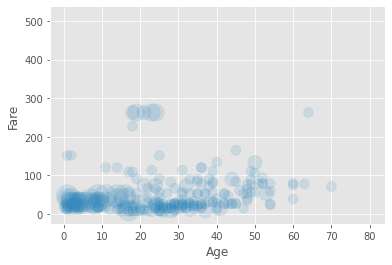

In [21]:
# 准备画布
fig,ax=plt.subplots(1,1,figsize=(6,4))
# 将第三个变量映射到大小上 ,形成气泡图,注意设置 透明度  
data.plot( kind = 'scatter', x='Age',y='Fare',s =size(data['SibSp']),alpha =0.15,ax=ax)

### Q092: 公用坐标轴将多变量绘制到一个图上

#### 2.3.2 共享坐标轴
2.3.2.1  是否存活【离散】的人在不同年龄【连续】上的票价【连续】分布情况

In [22]:
result = data[['Age','Survived','Fare']].groupby(['Age','Survived']).agg(np.mean).reset_index()

In [23]:
result

,Age,Survived,Fare
0,0.42,1,8.5167
1,0.67,1,14.5000
2,0.75,1,19.2583
3,0.83,1,23.8750
4,0.92,1,151.5500
...,...,...,...
137,70.00,0,40.7500
138,70.50,0,7.7500
139,71.00,0,42.0792
140,74.00,0,7.7750


<AxesSubplot:xlabel='Age'>

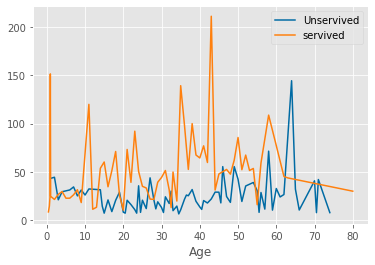

In [33]:
# 准备画布
fig,ax=plt.subplots(1,1,figsize=(6,4))
# 将不同的类别数据 绘制到同一张图上
result[result.Survived==0].plot(kind='line',x='Age',y='Fare',label='Unservived',legend=True,ax=ax)
result[result.Survived==1].plot(kind='line',x='Age',y='Fare',label='servived',legend=True,ax=ax)

### Q093: 根据离散变量分拆子图进行可视化
在三个变量中有类别变量时,可以采用分图的形式呈现.此时默认情况下,不同图的坐标轴不一定一致. 如要一致可以手动设置.

#### 2.3.3.1 是否存活【离散】的人在不同年龄【连续】上的票价【连续】分布情况

<AxesSubplot:xlabel='Age'>

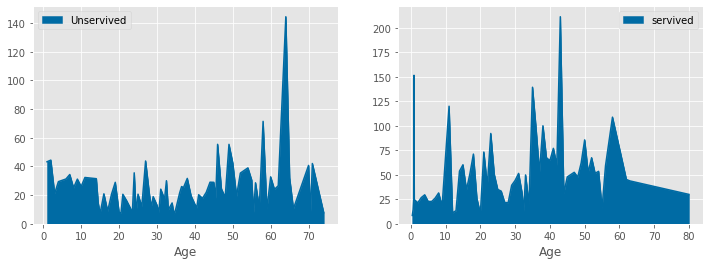

In [38]:
# 准备画布
fig,ax=plt.subplots(1,2,figsize=(12,4))
# 将不同的类别数据 绘制到同一张图上
result[result.Survived==0].plot(kind='area',x='Age',y='Fare',label='Unservived',legend=True,ax=ax[0])  # 面积图
result[result.Survived==1].plot(kind='area',x='Age',y='Fare',label='servived',legend=True,ax=ax[1])

对比看看画图的程序有哪些差异. 以及绘制的坐标轴是否一致.

### 2.4. 三个变量以上
正如前面所说，绘图是为了直观简洁的传达信息。

因此，在一幅图中一次包含太多变量信息，可能会分散读者注意力，需权衡。

## 3. 图表美化

其实,做完上面两步,画出来的图基本完成信息的提炼与压缩。但是,通常这个图不光只有自己, 还有别人。

为了显示我们的专业和职业素养。怎么能不为图做些美化呢（锦上添花）。比如:

### 3.1 配色

可视化的成功与否,我觉得配色至少占3成 . 这是我整理PowerBI的默认配色卡.
丢弃 red blue 吧. 试试它们,让你图瞬间提升. 

### Q094: 为可视化图表自定义颜色

In [27]:
colorList = ['#C1232B','#B5C334','#FCCE10','#E87C25','#27727B',
             '#FE8463','#9BCA63','#FAD860','#F3A43B','#60C0DD',
             '#D7504B','#C6E579','#F4E001','#F0805A','#26C0C0']

array([<AxesSubplot:ylabel='0'>], dtype=object)

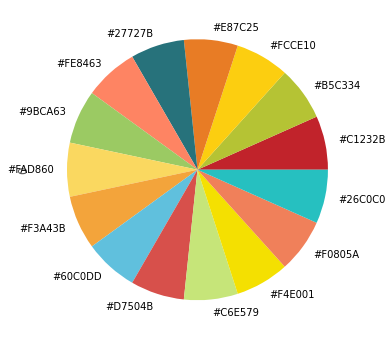

In [28]:
df = pd.DataFrame(np.random.randint(1,2,15).reshape(1,15),columns= colorList).T

df.plot.pie(figsize=(6,6),colors =colorList,subplots=True,legend=False)  # 用的是colors 而非color

### Q095: 为可视化图表选择不同的主题

### 3.2 主题

如果你懒得自定义颜色，还有种更省力的方式，获得一个还不错的图——主题. 只需要一条命令：`matplotlib.style.use('ggplot') `。

如果你也是从 R 转过来的话，那么 ggplot 风格的图一定让你倍感亲切。

In [34]:
matplotlib.style.use('ggplot')

In [37]:
matplotlib.style.use('tableau-colorblind10')

另外，matplotlib 还提供了，更多风格供你选择。

In [36]:
# 可用主题
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Q096: 可视化图表的精细化设置（标题、间距、字体、比例尺等）

### 3.3 其他美化操作


这里简单列几条常用的美化方向：
1. **调整间距** `fig.subplots_adjust()`
2. **添加标题** `fig.suptitle()` `ax.set_title()`
3. **增加标记线和记标文本** `ax.axvline()` `ax.text()`
4. **添加图例** `ax.legend()`
5. **调整字体**  `fontdict` `FontProperties()`
6. **调整坐标轴刻度范围，比例尺 以及格式化显示** `ax.set_xlim()` `ax.set_xticks()` `ax.xaxis.set_major_formatter()`
7. ...

In [44]:
# 查看 matplotlib 设置  plt.rcParams
plt.rcParams['font.sans-serif']

['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

#### 3.3.1 美化前

未美化，自己看也够了

<AxesSubplot:ylabel='Frequency'>

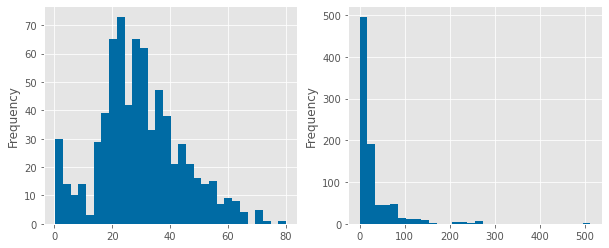

In [45]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
data['Age'].plot(kind='hist',bins = 30, ax=ax[0])  
data['Fare'].plot(kind='hist',bins = 30,ax=ax[1])

#### 美化后

In [46]:
# 查看系统可用的字体
import os
# all_fonts = os.listdir('C:\WINDOWS\Fonts')  # WIDOWNS 下  其他系统也一样

In [47]:
from matplotlib.ticker import FuncFormatter
# formats 需要带有一个pos 参数,传给 FuncFormatter
def formats(x,pos):
    return '${}'.format(int(x))

In [48]:
from matplotlib.font_manager import FontProperties  

font_title = FontProperties(fname="../input/msyh.ttc",  # 字体微软雅黑文件
                            stretch = 'extra-expanded',  # or 0 - 1000
                            weight='bold',  # 字体粗细
                            style = 'oblique',  # 斜体不起作用
                            size=20) 


font_legend = FontProperties('Times New Roman',  
                            stretch = 'extra-expanded',  # or 0 - 1000
                            weight='bold',  # 字体粗细
                            style = 'normal',   #  oblique work
                            size=11) 

In [49]:
font_text = {'family': 'Times New Roman',   # 'serif'
         'style': 'normal', # normal italic oblique
         'weight': 'normal',
         #'color':  '#27727B',  # 字体颜色
         'size': 14,
        }

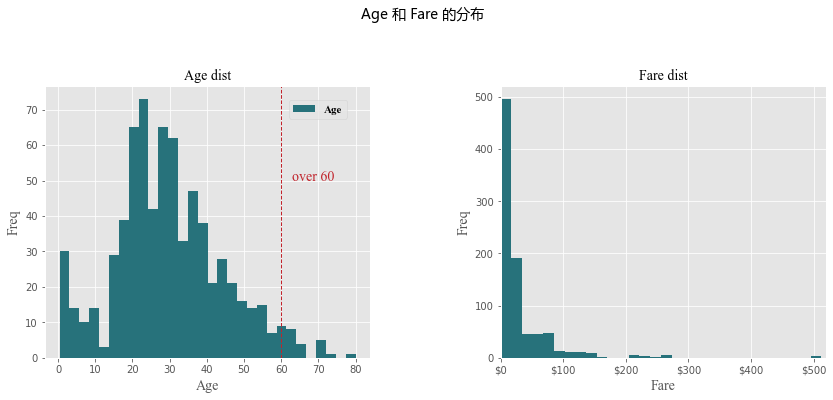

In [52]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
# 设置子图间距
fig.subplots_adjust(wspace =0.4, hspace =0.5)

# 设置大标题 
fig.suptitle(t='Age 和 Fare 的分布',x=0.5,y=1.1, fontdict=font_text,fontproperties=font_title)  # w为了中文 加入

# 绘制子图 1
data['Age'].plot(kind='hist',alpha =1.0,bins = 30,color = '#27727B',label='Age', ax=ax[0])  # label 是在图例legend 时显示的内容
# 绘制子图 2
data['Fare'].plot(kind='hist',alpha =1.0,bins = 30,color = '#27727B',ax =ax[1])

# 设置 x轴 标记线  axvline  axhline
ax[0].axvline(x=60, color='#C1232B', linestyle='--', linewidth=1)

# 设置标记值
ax[0].text(x=63,y=50,s='over 60',color='#C1232B' ,fontdict=font_text)
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html?highlight=legend#matplotlib.pyplot.legend

# 设置图例
# 可以通过指定位置 'upper' 或者 浮点数组表示，这里(x，y) 是占比而不是坐标
ax[0].legend(loc=(0.75,0.88),prop=font_legend)  

# 设置子标题
ax[0].set_title('Age dist',fontdict=font_text)
ax[1].set_title('Fare dist',fontdict=font_text)

# 设置  x 轴名字
ax[0].set_xlabel('Age',fontdict=font_text)
ax[1].set_xlabel('Fare',fontdict=font_text)

# 设置  y 轴名字
ax[0].set_ylabel('Freq',fontdict=font_text)
ax[1].set_ylabel('Freq',fontdict=font_text)

# ax[0].set(title='Age dist', xlabel='Age',ylabel = 'Freq') 快速设置子标题和坐标轴名字 但不可设置字体


# 设置刻度范围 (还有倒序作用)
ax[1].set_xlim([0,520])
# ax[1].set_xlim([520,0])

# 设置刻度切分粒度
ax[1].set_xticks(list(range(0,520,100)))
# -----------------------------
# 格式化坐标轴
formatter = FuncFormatter(formats)  
ax[1].xaxis.set_major_formatter(formatter)

参考官方文档：
https://matplotlib.org/api/axes_api.html

对应的代码量为 21 行，是美化前的 7 倍。所以回到最初的问题，想清楚最初画图的目的是什么，切勿迷失在纷繁的绘图函数与参数调整上。

talk is cheap, 直接看代码。其中的代码块可直接用，省去百度和查文档时间。

注：本文主要以 matplotlib 和 pandas 绘图函数演示。pandas 提供的绘图函数plot()其实是在 matplotlib 上做的简单封装。差异并不大，因此在实际举例时，就不将 pandas 画图与 matplotlib 做区别。

更多绘图工具包
- 如 matplotlib , seaborn 专题介绍. 将放在拓展学习部分,感兴趣的小伙伴可以自行学习.

## 4. 图片保存

In [53]:
fig.savefig("../output/plot.png", format ='png', dpi = 80, bbox_inches ='tight',transparent = False )

## 5. 其他

### Q098: 绘制饼图	Q099: 绘制折线图
### Q100: 绘制柱状图	Q101: 绘制散点图
### Q102: 绘制面积图	Q103: 绘制直方图

这些图形，在上面的介绍都有覆盖，这里就不再重复。大家可以翻回去再复习

## Cheat Sheet
![](https://imgkr.cn-bj.ufileos.com/3bc13ae5-00ff-4acd-be16-247dab388be3.png)

https://github.com/matplotlib/cheatsheets/

# 谢谢观看
Github 代码：https://github.com/kevin-meng/learn-data-analysis-the-hard-way
![](../pics/thankyou.png)
